In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
#X_train = X_train / 255
#X_test = X_test / 255
# Sets values between 0 and 1, because 255 is the highest possible value for every entry

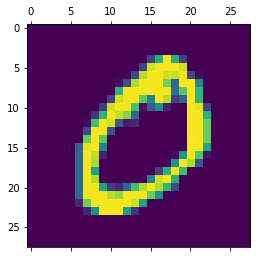

In [7]:
plt.matshow(X_train[1])

In [8]:
y_train[1]

0

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
X_train.shape # At first is two dimensional. The first number is the total number of entries

(60000, 28, 28)

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid") # 10 output and 784 input shape
]) # Sequential means there will be a stack of layers in the NN and will accept every layer as one element

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', # means output class is categorical and sparse means output variable is an int
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 817us/step - loss: 17.1222 - accuracy: 0.7685
Epoch 2/5
1875/1875 [==============================] - 2s 821us/step - loss: 5.8455 - accuracy: 0.8794
Epoch 3/5
1875/1875 [==============================] - 2s 808us/step - loss: 5.6430 - accuracy: 0.8821
Epoch 4/5
1875/1875 [==============================] - 1s 790us/step - loss: 5.2748 - accuracy: 0.88540s - loss: 5.2240 - accu
Epoch 5/5
1875/1875 [==============================] - 2s 821us/step - loss: 5.2766 - accuracy: 0.8864


In [13]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 663us/step - loss: 5.7015 - accuracy: 0.8921


[5.701509952545166, 0.8920999765396118]

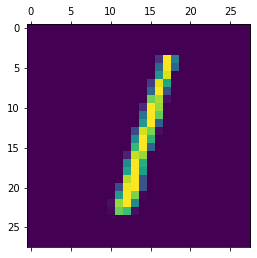

In [14]:
plt.matshow(X_test[2])

In [15]:
y_predicted = model.predict(X_test_flattened)
y_predicted[2]

array([0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 9.9999940e-01,
       8.8520948e-27, 2.1813345e-13, 1.6054511e-04, 5.0046453e-23,
       1.0000000e+00, 2.0877948e-12], dtype=float32)

In [16]:
np.argmax(y_predicted[2])

1

In [17]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[3, 0, 1, 0, 4]

In [18]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    0,    4,    3,    1,    2,    0,    0,    0],
       [   2, 1126,    3,    3,    0,    1,    0,    0,    0,    0],
       [ 130,  242,  633,    5,   16,    1,    2,    1,    2,    0],
       [  67,   65,  337,  538,    3,    0,    0,    0,    0,    0],
       [  12,   19,   50,  195,  703,    1,    1,    0,    0,    1],
       [ 115,   21,   96,  428,   86,  142,    2,    0,    2,    0],
       [ 140,   20,  520,   36,  136,   28,   78,    0,    0,    0],
       [  18,   39,  106,  644,   80,   41,    0,  100,    0,    0],
       [  26,  131,  250,  364,   83,   69,    7,    4,   40,    0],
       [  21,   21,   35,  583,  323,    1,    0,   18,    2,    5]])>

Text(69.0, 0.5, 'Truth')

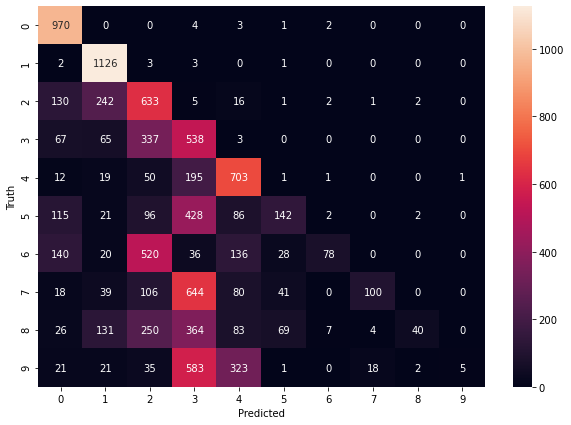

In [19]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [20]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
    # Second layer doesn't need shape arg, because it'll figure it out from the previous
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 6.4513 - accuracy: 0.7797
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4185 - accuracy: 0.8951
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2975 - accuracy: 0.9235
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2544 - accuracy: 0.9308
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2423 - accuracy: 0.9367
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2298 - accuracy: 0.9391
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2090 - accuracy: 0.9451
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1951 - accuracy: 0.9497: 0s - loss: 0.1936 - ac
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1960 - accuracy: 0.9495
Epoch 10/10
1875/1875 [==============================] - 2

In [21]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 872us/step - loss: 0.2501 - accuracy: 0.9475


[0.25012800097465515, 0.9474999904632568]

Text(69.0, 0.5, 'Truth')

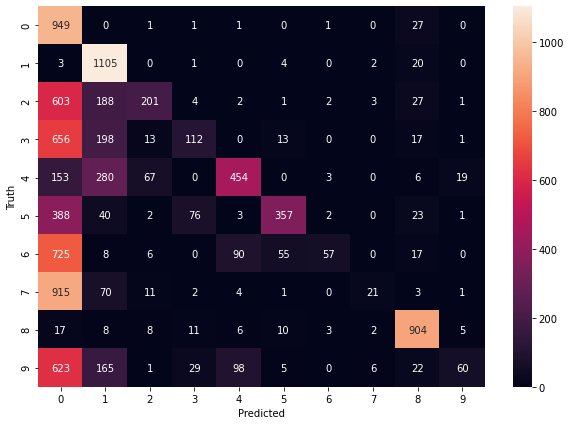

In [22]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #Now,you don't need to create flatten array
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
    # Second layer doesn't need shape arg, because it'll figure it out from the previous
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 9.1565 - accuracy: 0.7921
Epoch 2/5
1875/1875 [==============================] - 2s 960us/step - loss: 0.4355 - accuracy: 0.8957
Epoch 3/5
1875/1875 [==============================] - 2s 965us/step - loss: 0.3068 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 2s 966us/step - loss: 0.2638 - accuracy: 0.9317
Epoch 5/5
1875/1875 [==============================] - 2s 947us/step - loss: 0.2336 - accuracy: 0.9387
